In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers


In [5]:
imdb_train, imdb_validate, imdb_test = tfds.load(
    name="imdb_reviews",
    split=["train[:80%]", "train[80%:]", "test"],
    as_supervised=True
)

In [4]:
next(imdb_train.take(1).as_numpy_iterator())

(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
 0)

In [6]:
# tokenize = clean from punctioation etc. = split into tokens
# map to numbers

In [8]:
!pip install tensorflow_hub

     |████████████████████████████████| 101 kB 982 kB/s ta 0:00:01


In [11]:
import tensorflow_hub as hub # collection of pretrained neuro networks

embedding = hub.load("https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1")

embedding_layer = hub.KerasLayer(
    embedding,
    input_shape=[],
    dtype=tf.string,
    trainable=True
)

In [12]:
reviews_batch, labels_batch = next(iter(imdb_train.batch(1)))
embedding_layer(reviews_batch)

<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ]],
      dtype=float32)>

In [13]:
# all models in Tensorflows are layers - you can add an entire model as a layer in another one

In [16]:
model = models.Sequential()
model.add(embedding_layer)
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    imdb_train.cache().shuffle(10000).batch(32),
    epochs=10,
    validation_data=imdb_validate.cache().batch(32)

)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 3s 5ms/step - loss: 0.5417 - accuracy: 0.7226 - val_loss: 0.4006 - val_accuracy: 0.8266
Epoch 2/10
625/625 [==============================] - 3s 4ms/step - loss: 0.3489 - accuracy: 0.8553 - val_loss: 0.3209 - val_accuracy: 0.8644
Epoch 3/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2802 - accuracy: 0

In [17]:
def plot_history(history):
    plt.plot(history.history["loss"], label=['loss'])
    plt.plot(history.history["val_loss"], label=['val_loss'])
    plt.legend()
    plt.show()
    plt.close()
    
    
    plt.plot(history.history["accuracy"], label=['accuracy'])
    plt.plot(history.history["val_accuracy"], label=['val_accuracy'])
    plt.legend()
    plt.show()
    plt.close()

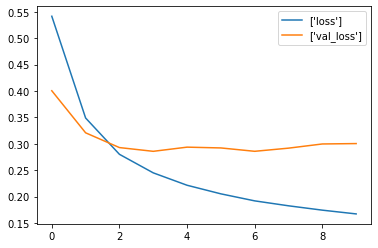

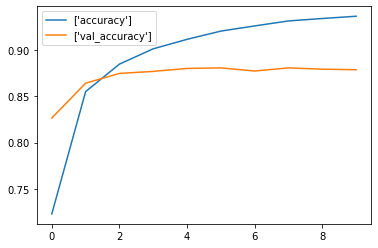

In [18]:
plot_history(history)